### Exp 2a
TEST EIT (basic/dual) on data "daily9"

In [2]:
base_path="../eit_basic_dual_unreduced_experiments/exp_2a" #Don't add '/' at start and end
T=880 #Training time period
C=10000 #Capital available
file="daily9" #Index_file
m=60 #Inital Size of Kernel
lbuck=20 #Size Of Buckets
pho=0.2 #Transaction Cost Proportion
lamda=1/(100*C) # lower_bound for capital invested in jth stock
nuh=0.35  # upper_bound
xii=1.2 # Limit for Tracking Error
k=100 #Cardinality constraint for stocks in portfolio
p=3 #If stock not selected in optimal soln in last p iters then it is to be dropped from kernel
f=12
w_return=100
w_risk=10000
w_risk_down=1
x0_choice=2
#cj,cb are declared in script

In [3]:
import sys
from IPython.display import Image, display
sys.path.insert(0,"..")

In [4]:
from eit_basic_experiment import TestEitBasic
from eit_dual_exp import TestEitDual

### Basic

Running Linear Relaxation of EIT ...
/Users/ashish1610dhiman/data_projects/index_tracking_kgp/eit_paper/notebooks
Solving LP(EIT)
***************************************************
Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Sep  8 2020 

Starting solution of the Linear programming problem using Dual Simplex

Coin0506I Presolve 1938 (-1281) rows, 2864 (-1281) columns and 427446 (-3843) elements
Clp0014I Perturbing problem by 0.001% of 0.07439245 - largest nonzero change 0.00010337247 ( 248.97368%) - largest zero change 0.00010334962
Clp0006I 1122  Obj 6.3078526 Primal inf 107302.97 (728)
Clp0006I 1583  Obj 6.086699 Primal inf 95594.485 (645)
Clp0006I 1955  Obj 5.9950854 Primal inf 7968.6436 (477)
Clp0006I 2305  Obj 5.9584708 Primal inf 2001.3761 (333)
Clp0000I Optimal - objective value 5.9929982
Coin0511I After Postsolve, objective 5.9929982, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 5.992998249 - 2534 iterations time 3.932, Presolve 0.07
***

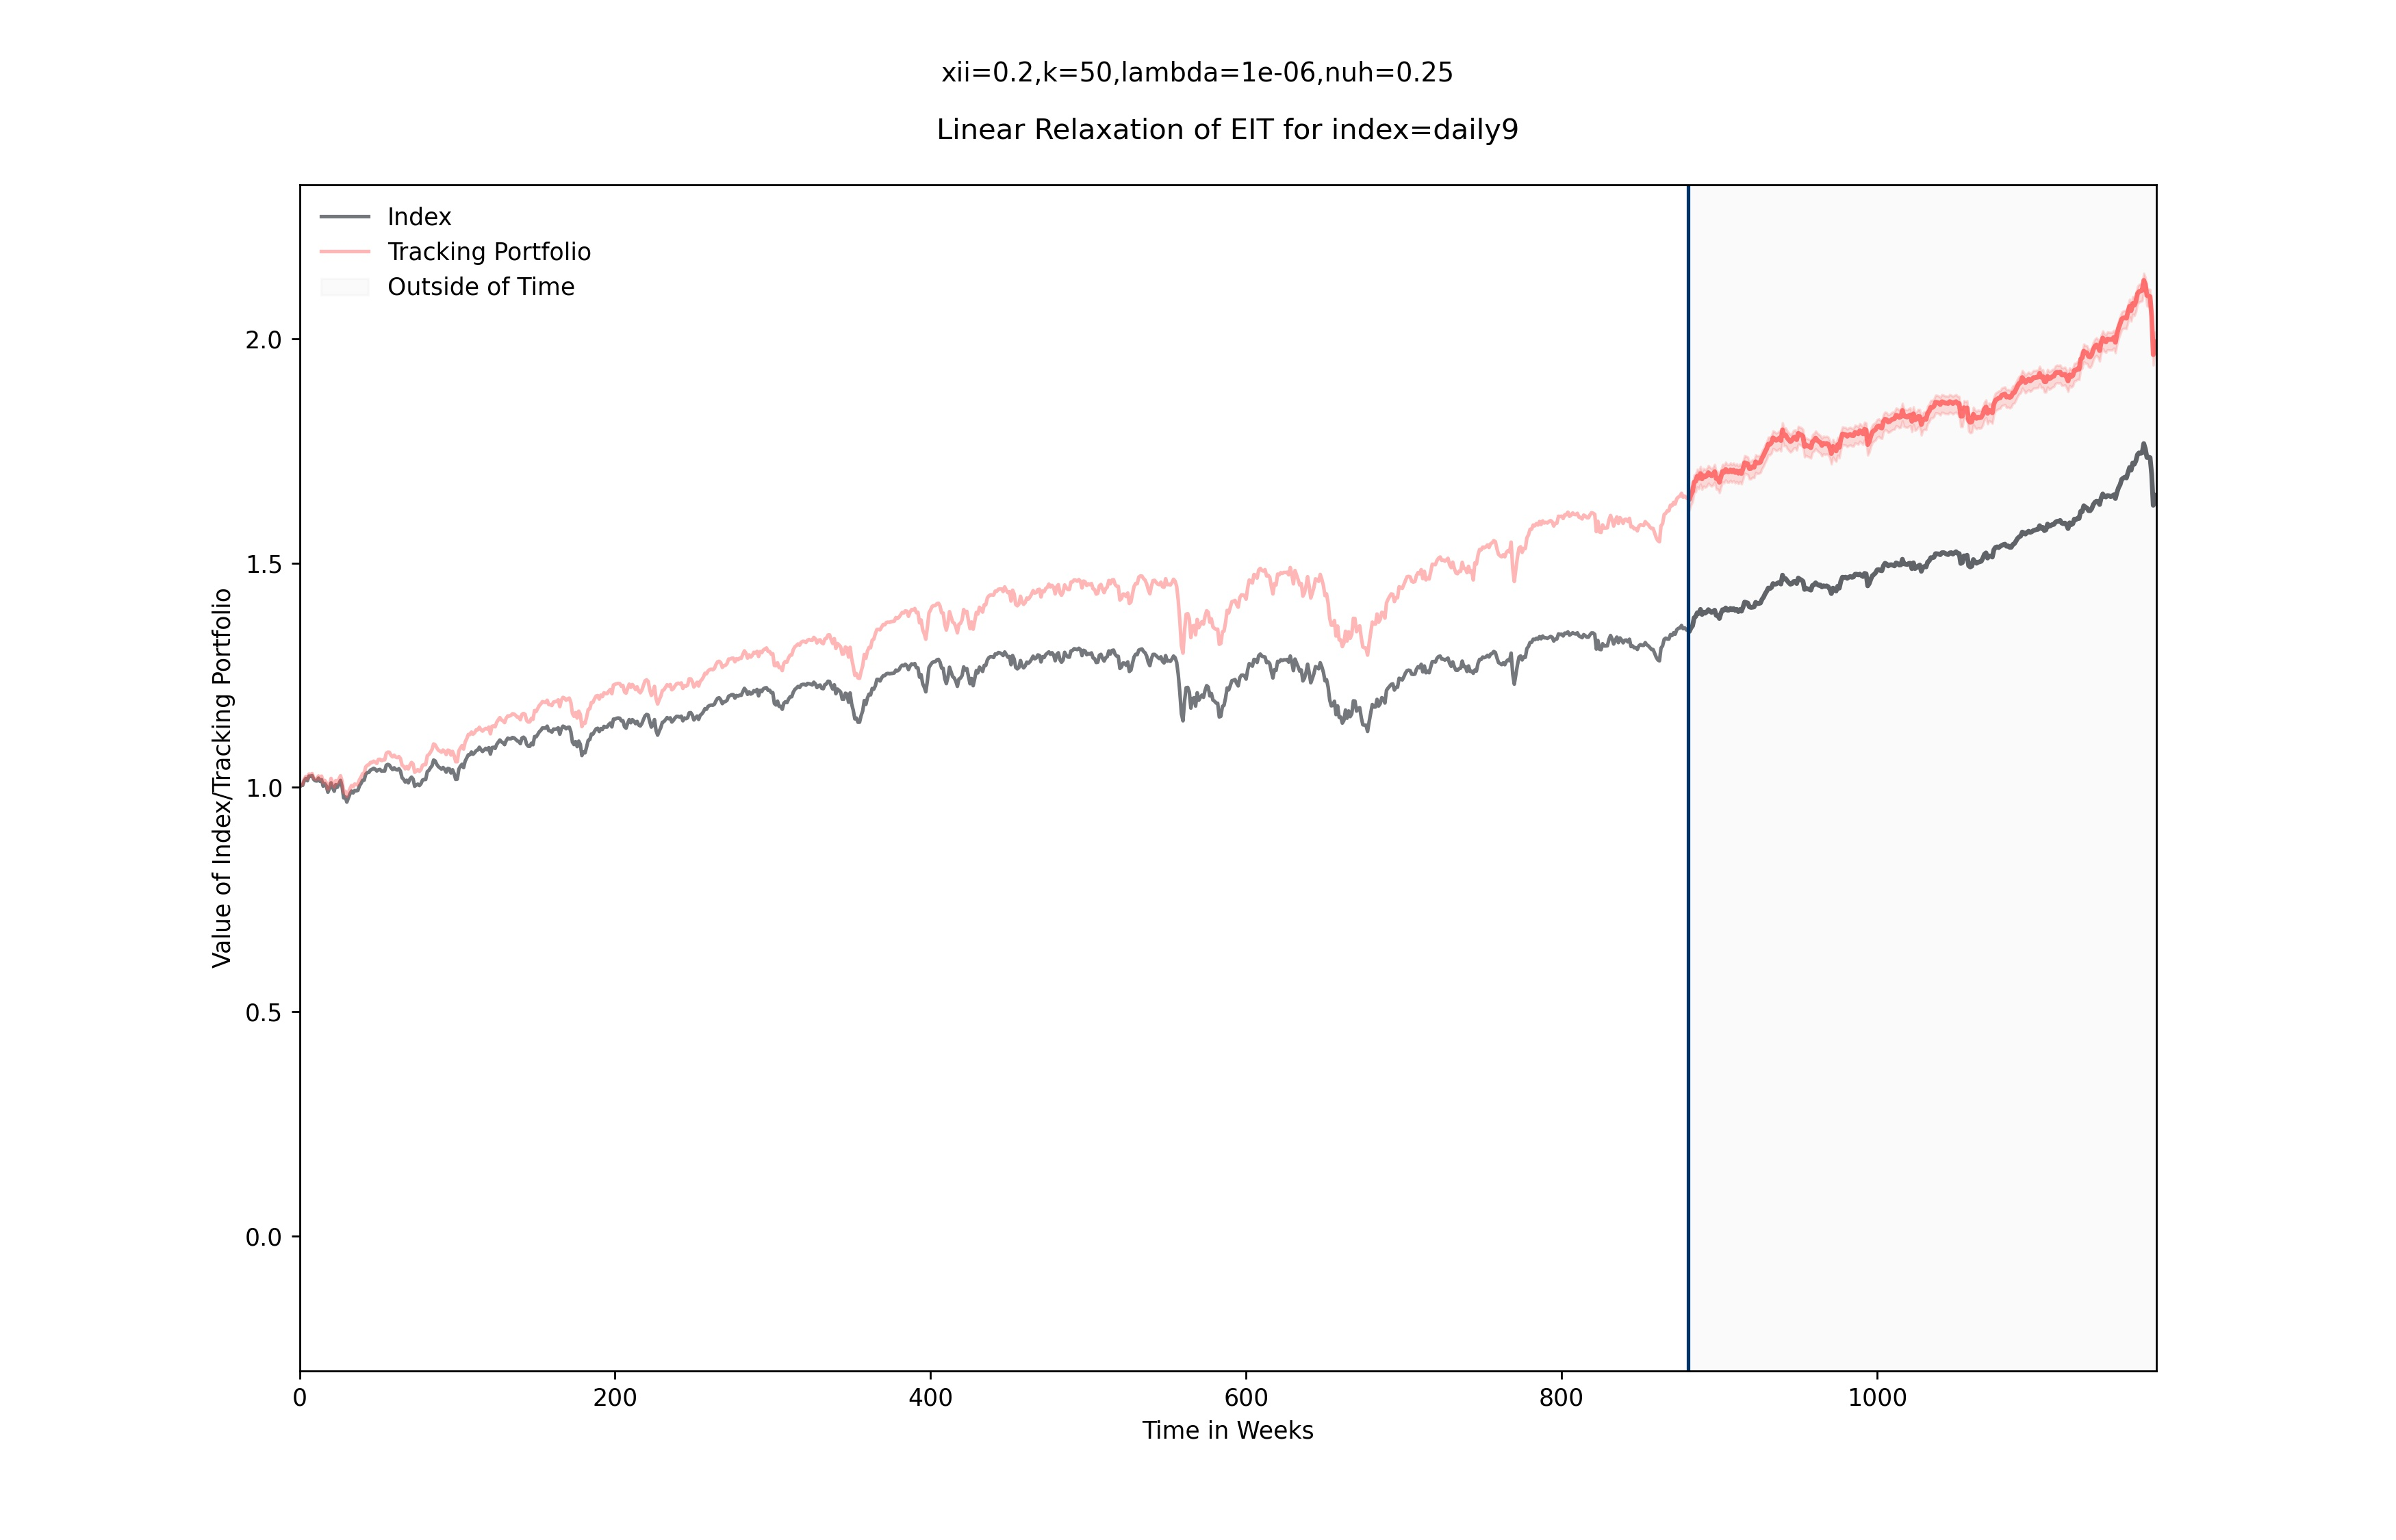

In [4]:
%%time
!python ../src/linear_relaxation.py $file $T $xii $k $pho $nuh $C $lamda $f $base_path

Image(filename=base_path+'/LP_EIT for index_{}.jpg'.format(file))

In [4]:
test_eit_basic=TestEitBasic(output=base_path,T=T,C=C,file=file,m=m,lbuck=lbuck,\
                                        pho=pho,lamda=lamda,nuh=nuh,xii=xii,k=k,p=p,f=f)
test_eit_basic.give_params()

params(output='../eit_basic_dual_unreduced_experiments/exp_2a', T=880, C=10000, file='daily9', m=60, lbuck=20, pho=0.2, lamda=1e-06, nuh=0.35, xii=1.2, k=100, p=3, f=12)

In [5]:
%%time
result=test_eit_basic.step_1(from_root=False,verbose=True)

+----------------------------------------------------+
    Step 1: Solving Linear Relaxation of EIT-Basic
+----------------------------------------------------+
+----------------------------------------------------+
    Step 1 complete in 24.90s
+----------------------------------------------------+
CPU times: user 5.83 ms, sys: 3.49 ms, total: 9.32 ms
Wall time: 24.9 s


In [6]:
result_2a=test_eit_basic.step_2a(result[0],result[1],result[2],from_root=False,verbose=True)

+----------------------------------------------------+
    Step 2a: Sort Securities and create buckets
+----------------------------------------------------+


/Users/ashish1610dhiman/opt/anaconda3/envs/eit_paper/lib/python3.8/site-packages/pulp/pulp.py:1198: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
../src/sort_and_buckets.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_optimal.sort_values(by="value",ascending=False,inplace=True)


In [7]:
result_2b=test_eit_basic.step_2b(kernel=result_2a[0], buckets=result_2a[1], from_root=False, verbose=True)

+----------------------------------------------------+
     Step 2b: Solve EIT(kernel) and get lower-bound
+----------------------------------------------------+
Solving EIT(kernel)
***************************************************
***************************************************

Optimisation Status=0,Objective Value=4.205079977246329
OPTIMAL(0), ERROR(-1), INFEASIBLE(1), UNBOUNDED(2)


In [8]:
result_3=test_eit_basic.step_3(kernel=result_2a[0], L=result_2a[2],z = result_2b[0],\
                              Nb=result_2a[3], buckets=result_2a[1],\
                              failure = result_2b[1],execution_result = result_2b[-1],from_root=False, verbose=True)

+----------------------------------------------------+
    Step 3: Execution Phase of Kernel Search
+----------------------------------------------------+


For bucket=1
Solving EIT(kernel+bucket-1)
***************************************************
Optimisation Status=OptimizationStatus.OPTIMAL,Objective Value=4.327531393469789
OPTIMAL(0), ERROR(-1), INFEASIBLE(1), UNBOUNDED(2)
Following stocks from bucket added to kernel:
security_130
security_6
security_33
security_38
security_193
security_331
security_423
security_229
security_190
security_322
security_59
security_197
security_88
security_22
security_375
security_67
security_386
security_433
security_449
security_142
***************************************************
Updating Lower Bound
Updating Kernel
Length of Old Kernel=60
Length of Updated Kernel=80
Current Length Kernel=80


For bucket=2
Solving EIT(kernel+bucket-2)
***************************************************
Optimisation Status=OptimizationStatus.OPTIMAL,Objective 

Removing security_316 from kernel
Removing security_115 from kernel
Current Length Kernel=107


In [9]:
%%time
%%capture
result_df=test_eit_basic.run_experiment(from_root=False,verbose=False);
result_df["z_linear"]=test_eit_basic.objective_linear

CPU times: user 12min 6s, sys: 10.3 s, total: 12min 16s
Wall time: 14min 6s


### Dual

In [5]:
base_path="../eit_basic_dual_unreduced_experiments/exp_2b"

Running Linear Relaxation of EIT ...with input args=14
/Users/ashish1610dhiman/data_projects/index_tracking_kgp/eit_paper/notebooks
Solving LP(EIT)
***************************************************
Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Sep  8 2020 

Starting solution of the Linear programming problem using Dual Simplex

Coin0506I Presolve 2037 (-1131) rows, 3014 (-1131) columns and 426036 (-3393) elements
Clp0014I Perturbing problem by 0.001% of 1.7596558e-05 - largest nonzero change 9.9801626e-05 ( 45647660%) - largest zero change 3.5153559e-05
Clp0006I 1077  Obj -0.34562448 Primal inf 70645.057 (1010)
Clp0006I 1578  Obj -0.64921121 Primal inf 28223.111 (839)
Clp0006I 2054  Obj -0.85046838 Primal inf 36607.323 (780)
Clp0006I 2526  Obj -0.9299027 Primal inf 18739.05 (652)
Clp0000I Optimal - objective value -0.90229485
Coin0511I After Postsolve, objective -0.90229485, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective -0.9022948489 - 2785 iterat

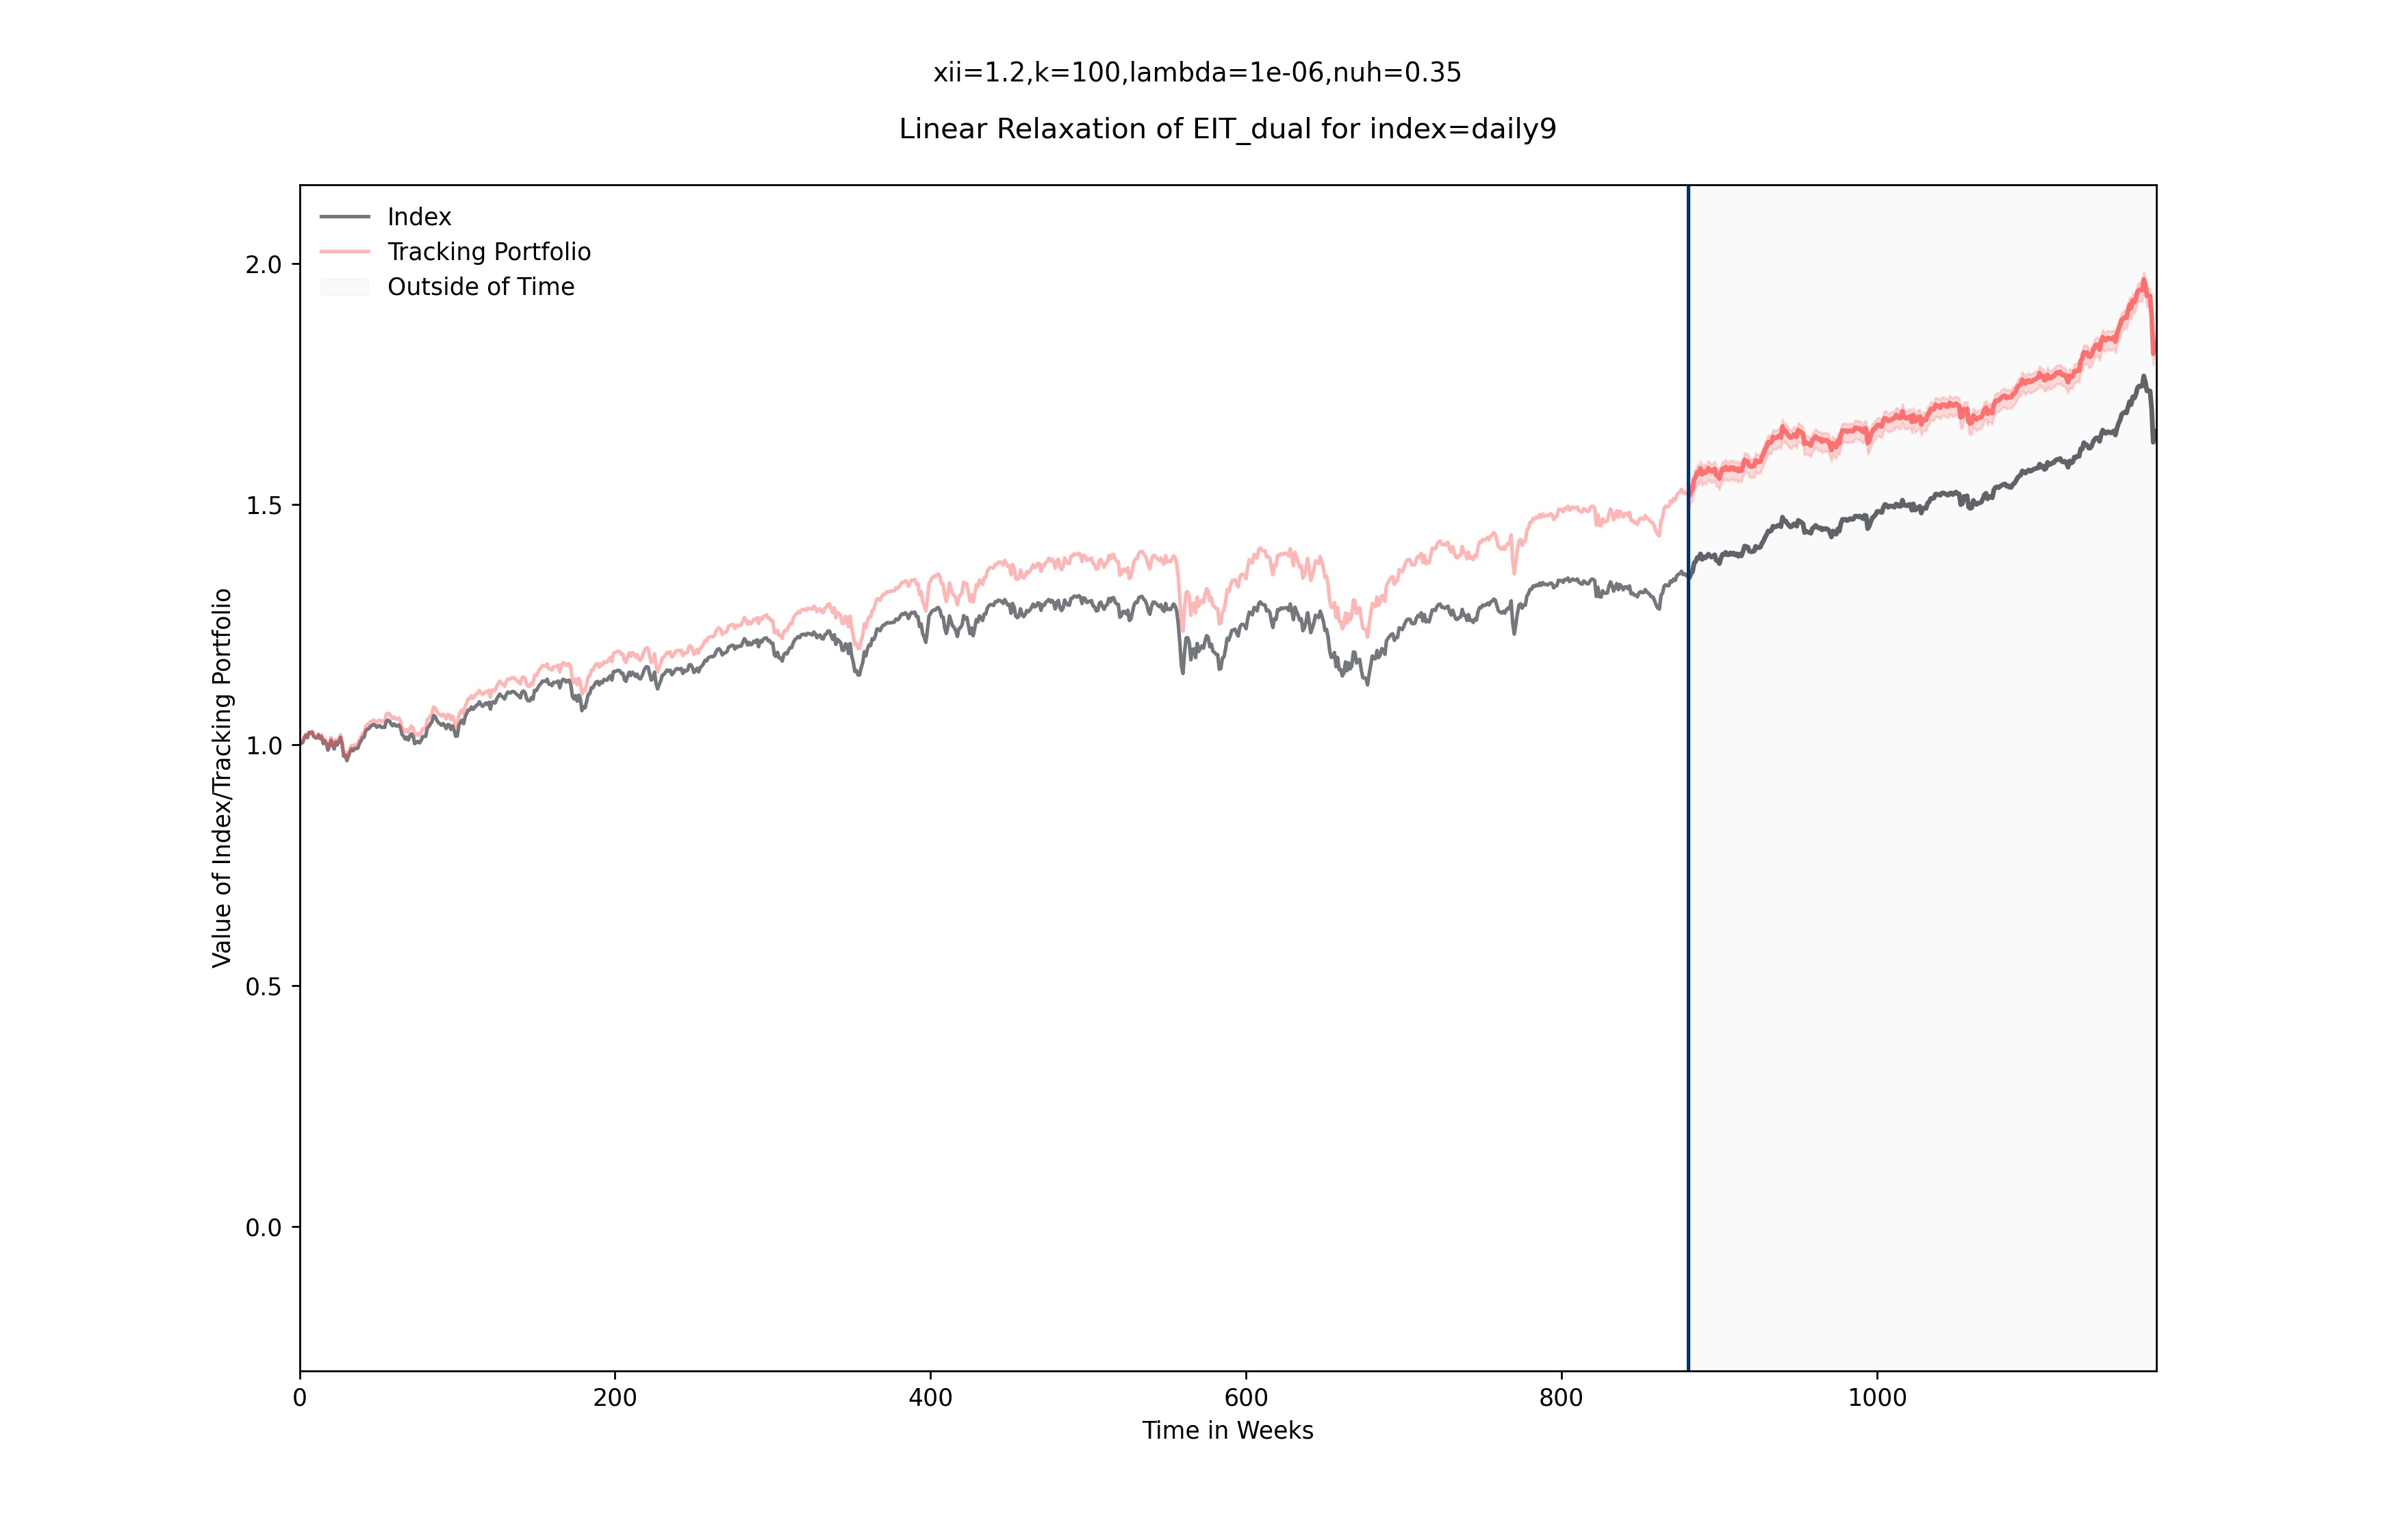

In [6]:
%%time
!python ../src_dual/linear_relaxation.py $file $T $xii $k $pho $nuh $C $lamda $f\
$w_return $w_risk $w_risk_down $base_path

Image(filename=base_path+'/LP_EIT_Dual for index_{}.jpg'.format(file))

In [7]:
test_eit_dual=TestEitDual(output=base_path,T=T,C=C,file=file,m=m,lbuck=lbuck,pho=pho,lamda=lamda,\
                          nuh=nuh,xii=xii,k=k,p=p,f=f,w_risk=w_risk,w_return=w_return,w_risk_down=w_risk_down)

In [8]:
test_eit_dual.give_params()

params(output='../eit_basic_dual_unreduced_experiments/exp_2b', T=880, C=10000, file='daily9', m=60, lbuck=20, pho=0.2, lamda=1e-06, nuh=0.35, xii=1.2, k=100, p=3, f=12, w_risk=10000, w_return=100, w_risk_down=1)

In [9]:
result=test_eit_dual.step_1(from_root=False,verbose=True)

+----------------------------------------------------+
    Step 1: Solving Linear Relaxation of EIT-Dual
+----------------------------------------------------+
+----------------------------------------------------+
    Step 1 complete in 30.12s
+----------------------------------------------------+


In [10]:
result[1]

-0.941723560351854

In [11]:
result_2a=test_eit_dual.step_2a(result[0],result[1],result[2],from_root=False,verbose=True)

+----------------------------------------------------+
    Step 2a: Sort Securities and create buckets
+----------------------------------------------------+


/Users/ashish1610dhiman/opt/anaconda3/envs/eit_paper/lib/python3.8/site-packages/pulp/pulp.py:1198: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
../src_dual/sort_and_buckets.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_optimal.sort_values(by="value", ascending=False, inplace=True)


In [12]:
result_2b=test_eit_dual.step_2b(kernel=result_2a[0], buckets=result_2a[1], from_root=False, verbose=True)

+----------------------------------------------------+
     Step 2b: Solve EIT(kernel) and get lower-bound
+----------------------------------------------------+
Solving EIT_Dual(kernel)
***************************************************
***************************************************

Optimisation Status=0,Objective Value=-14.379152897858766
OPTIMAL(0), ERROR(-1), INFEASIBLE(1), UNBOUNDED(2)


In [13]:
result_2b[1]

False

In [ ]:
result_3=test_eit_dual.step_3(kernel=result_2a[0], L=result_2a[2],z = result_2b[0],\
                              Nb=result_2a[3], buckets=result_2a[1],\
                              failure = result_2b[1],execution_result = result_2b[-1],from_root=False, verbose=True)

+----------------------------------------------------+
    Step 3: Execution Phase of Kernel Search
+----------------------------------------------------+


For bucket=1
Solving EIT(kernel+bucket-1)
***************************************************
Optimisation Status=OptimizationStatus.OPTIMAL,Objective Value=-7.688164517495183
OPTIMAL(0), ERROR(-1), INFEASIBLE(1), UNBOUNDED(2)
Following stocks from bucket added to kernel:
security_215
security_154
security_36
security_396
security_337
security_9
security_19
security_304
security_178
security_153
security_440
security_266
security_342
security_233
security_242
security_66
***************************************************
Updating Lower Bound
Updating Kernel
Length of Old Kernel=60
Length of Updated Kernel=76
Current Length Kernel=76


For bucket=2
Solving EIT(kernel+bucket-2)
***************************************************
Optimisation Status=OptimizationStatus.OPTIMAL,Objective Value=-5.561907986929095
OPTIMAL(0), ERROR(-1), 